In [9]:
import os
import sys
from pathlib import Path

# module_path = os.path.abspath(os.path.join('../'))
# if module_path not in sys.path:
#     sys.path.append(module_path)

import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


# from tqdm import tqdm
# from pathlib import Path
# from scipy.ndimage import gaussian_filter
# from matplotlib.colors import LogNorm

# sys.path.append("code/preprocessing/utils/")
# from segment2D     import *
# from segment3D     import *
# from file_handling import *

sys.path.append("code/analysis/utils/")

from data_class import AutocorrelationData
# from variation_functions import spatial_variation, global_density

pix_to_um = get_pixel_size()

In [ ]:
# Fit line to h and subtract to get fluctuations around cell growth

In [14]:
# experimental parameters
frames_to_hours = 1 / 12


# analytical parameters
bin_data = False
param = 'hh'


# define density colormap
densities  = np.arange(1400, 3400)
Ndensities = len(densities)

cmap   = mpl.colormaps['viridis']
colors = cmap(np.linspace(0.1, 0.9, Ndensities))
sm     = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=densities.min(), vmax=densities.max()))

In [10]:
dataset = "holomonitor_20240516_A2-1"

#config  = json.load(open(f"data/experimental/configs/{dataset}.json"))
#microscope = Path(dataset).stem.split("_")[0]

In [11]:
# load data

#h_stack = import_stack(f"data/experimental/raw/{dataset}/", config)

#cellprop = SegmentationData(f"data/experimental/processed/{dataset}/cell_props.p")

cellcorr  = AutocorrelationData(f"data/experimental/processed/{dataset}/cell_autocorr.p")

#fieldcorr = AutocorrelationData(f"data/experimental/processed/{dataset}/field_autocorr.p")
# df     = pd.read_csv(f"data/experimental/processed/{dataset}/dataframe_unfiltered.csv")

# print("cell:",  cellcorr.log)
#print("field:", fieldcorr.log)

State loaded from data/experimental/processed/holomonitor_20240516_A2-1/cell_autocorr.p.


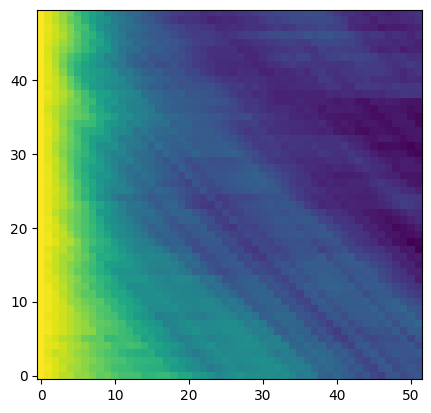

In [23]:
Nframes = len(cellcorr.temporal_cell['hh'])
plt.imshow(cellcorr.temporal_cell['hh'][0:50], origin="lower")

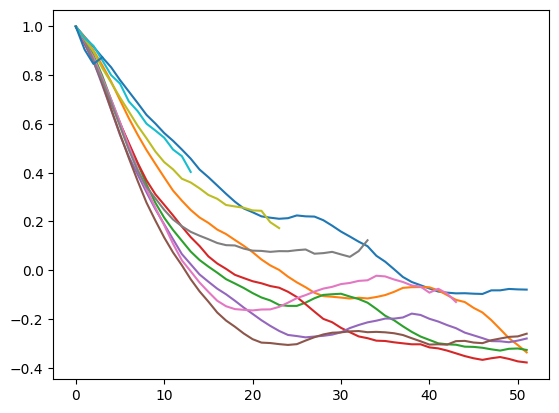

In [30]:
for i in range(0, Nframes, 10):
    plt.plot(np.mean(cellcorr.temporal_cell['hh'][i:i+10], axis=0))
